## Ordinary Least Squares, Least Squares Estimation

A core concern in machine learning is _inference_, being able to predict future data based on past data.  An obvious way is to base your predictions on the _mean_ of a statistical model.

Have a look at the below code:

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("../Data/Advertising.csv", index_col=0)
df = df[["TV", "Sales"]]
df.head()

,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


We have simplified the dataset to one parameter, the expenditure on advertisement on TV (which says something about how old this data is) and the corresponding amount of sales. In exercise 2 we investigated the _trend_ of TV against Sales. Now we will perform a _regression_ on the mean of the response (Sales), in other words we will find a regression line that follows the distribution of Sales given the amounts spent on TV ads (this is precisely $\mu_{Y|X}$).

### Exercise 1

1) Create a _design matrix_ $\mathbf{A}$ that corresponds to the right-hand side of the equation $Y = \beta_0 + \beta_1X$. Remember that what we are looking for are not the solutions to the system of equations or the values of x (which are given), but the values of the coefficients! How should $\beta_0$, the _bias_ or _intercept_, ie the displacement from 0 where the line crosses the $x$ axis, be handled? 

2) Perform a _least squares approximation_ to find the values of the coefficients. The equation is:
\begin{equation*}
\mathbf{b} = (A^TA)^{-1}A^TY
\end{equation*}

3) Plot the original data and your regression line in the same plot, that is the line $y = b_0 + b_1x$.

4) Find the variability of X, $S_{xx}$.
\begin{equation*}
S_{xx} = \sum_{i=1}^n(x_i - \bar{x})^2
\end{equation*}
5) Find the Sum of Square Errors about the regression line.
\begin{equation*}
\mathrm{SSE} = \sum_{i=0}^n(y_i - b_0 - b_1x_i)^2
\end{equation*}

6) Estimate the variance about the _true_ regression line.
\begin{equation*}
\mathrm{S}^2 = SSE / (n-2)
\end{equation*}

### A)

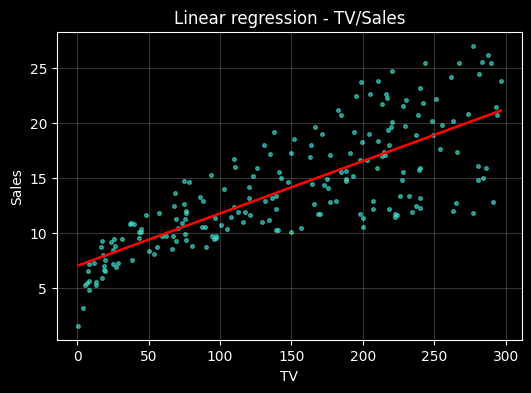

In [97]:
X = df['TV']
Y = df['Sales']
A = np.column_stack([np.ones_like(X), X])

beta = np.linalg.inv(A.T @ A) @ A.T @ Y
beta0, beta1 = beta

y = beta0 + beta1*X

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X, Y, s=7, color = 'turquoise', alpha = 0.6)
ax.plot(X, y, color = 'red')
ax.set_ylabel("Sales")
ax.set_xlabel("TV")
ax.set_title("Linear regression - TV/Sales")
ax.grid(True, alpha=0.2)

In [98]:
mean_x = np.mean(X)
S_xx = np.sum((X - mean_x)**2)
S_xx

y_hat = beta0 + beta1 * X
SSE = np.sum((Y - y_hat)**2)
n = len(Y)
S2 = SSE / (n -2) #(S^2 är samma som MSE, mean squared error)
sigma = np.sqrt(S2) #standard deviation
sigma

np.float64(3.2586563686504624)

### Exercise 2

Inferences on the slope of the line ($b_1$) can provide statistical evidence to conclude that the slope of the true regression line is not zero, in other words that a line really does capture some part of the behaviour of Y. 

1) Test the following hypothesis:
\begin{align*}
&H_0: \beta_1 = 0 \\
&H_1: \beta_1 \neq 0 \\
&T_{n-2} = \frac{B_1}{S/\sqrt{S_{xx}}}
\end{align*}
where the test rejects for large values in either positive or negative directions (ie a two-tailed test). What does it mean if this test accepts the null hypothesis?

2) Find a 95\% confidence interval on the slope of the regression line:
\begin{equation*}
B_1 \pm t_{\alpha/2}S/\sqrt{S_{xx}}
\end{equation*}



In [100]:
Tn_2 = beta1 / (sigma / np.sqrt(S_xx))
Tn_2

np.float64(17.667625600875514)

### Exercise 3

The intercept is simply $b_0$. For many problems this is a kind of 'background' level in the data, for the advertisement problem it's the amount of sales that happen without any ads.

1) Test the following hypotheses:

\begin{align*}
&H_0: \beta_1 = 0 \\
&H_1: \beta_1 > 0 \\
&H_2: \beta_1 < 0 \\
&T_{n-2} = \frac{B_0}{\frac{S\sqrt{\sum x^2}}{\sqrt{nS_{xx}}}}
\end{align*}
These are single-tailed tests.

2) Find a 95% confidence interval on the intercept.
\begin{equation*}
B_0 \pm t_{\alpha/2}\frac{S\sqrt{\sum x^2}}{\sqrt{nS_{xx}}}
\end{equation*}

3) Find a confidence interval for the mean for each row in the data:
\begin{equation*}
\hat{\mu}_{Y|x} \pm t_{\alpha/2}S\sqrt{\frac{1}{n} + \frac{(x-\bar{x})^2}{S_{xx}}}
\end{equation*}

4) Plot a _confidence band_ for your regression line.